In [1]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import pandas as pd
import sklearn

from mpl_toolkits.mplot3d import Axes3D,axes3d

# 검증
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# 모델
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC #분류용?
from sklearn.svm import LinearSVR #회귀용?
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

# 예제 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_iris


#스케일 조정
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#차원 축소
from sklearn.decomposition import PCA

#구간 분할
from sklearn.preprocessing import KBinsDiscretizer

#방정식
from sklearn.preprocessing import PolynomialFeatures
#각종 지수: KS11(코스피지수), KQ11(코스닥지수), DJI(다우지수), IXIC(나스닥 지수), US500(S&P 5000)

#이동평균선
import FinanceDataReader as web
import time



C:\Program Files\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Program Files\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
#뼈대
def SetXY(stock):
    KS=fdr.DataReader(stock,"2009-01-01","2019-08-14")
    time=np.linspace(0,10,KS.shape[0],endpoint="False").reshape(-1,1)
    X = pd.concat([pd.DataFrame(time, index = KS.index, columns = ['time']),KS],axis=1)
    y  = KS['Close'].shift(-1).dropna(axis=0)

    MA_10=X["Close"].rolling(10).mean().rename("MA_10") #이평선 추가
    MA_60=X["Close"].rolling(60).mean().rename("MA_60")
    X=pd.concat([pd.DataFrame(time,index=KS.index,columns=['time']),KS,MA_10,MA_60],axis=1)
    X = X.loc[y.index].dropna(axis=0)
    y=y[str(X.index[0])[0:10]:]
    return X,y

In [11]:
X,y=SetXY("KS11")

C:\Program Files\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Program Files\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


트레인 점수 : 0.9976658756143106
테스트 점수 : -0.502095909893955


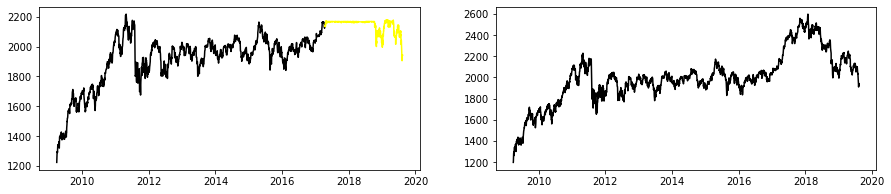

In [12]:
fig, axes= plt.subplots(1,2,figsize=(15,3))
plt.plot(X.index,X["Close"],'k-')
X_train,X_test,y_train,y_test=X[:2000],X[2000:],y[:2000],y[2000:]
reg=RandomForestRegressor(random_state=2).fit(X_train,y_train)
axes[0].plot(X_train.index,reg.predict(X_train),'black')
axes[0].plot(X_test.index,reg.predict(X_test),'yellow')


print("트레인 점수 : {}".format(reg.score(X_train,y_train)))
print("테스트 점수 : {}".format(reg.score(X_test,y_test)))


In [ ]:
               #SVR

for a in ["KS11","KQ11",'IXIC']:
    X,y=stock.SetXY(a)
    len=2000
    X_train,X_test,y_train,y_test=X[:len],X[len:],y[:len],y[len:]
    
    reg=Ridge(alpha=0.001).fit(X_train,y_train)
    
    print("트레인 점수 : {}".format(reg.score(X_train,y_train)))
    print("테스트 점수 : {}".format(reg.score(X_test,y_test)))
    
    fig, axes= plt.subplots(1,2,figsize=(15,3))
    plt.plot(X.index,X["Close"],'k-')
    axes[0].plot(X_train.index,reg.predict(X_train),'black')
    axes[0].plot(X_test.index,reg.predict(X_test),'yellow')


C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.543748e-21
  overwrite_a=True).T


트레인 점수 : 0.9892752360216441
테스트 점수 : 0.9869360386509045


C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number3.979975e-21
  overwrite_a=True).T


트레인 점수 : 0.9927812160496947
테스트 점수 : 0.9847077386373679


C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.550538e-21
  overwrite_a=True).T
C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.109258e-21
  overwrite_a=True).T
C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.661943e-21
  overwrite_a=True).T
C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Recipr

최고점수 :0.98
최적 매개변수 : {'alpha': 100}
최악점수 :-6.32
최악 매개변수 : {'worst_alpha': 10000000000}


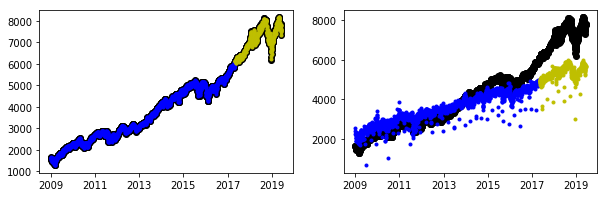

In [16]:
#  SVM에 그리드 서치,교차 검증

best_score=-100
worst_score=100
length=int(len(X)*0.8)
X_trainval,X_test,y_trainval,y_test=X[:length],X[length:],y[:length],y[length:]
length2=int(len(X_trainval)*0.8)
X_train,X_valid,y_train,y_valid=X_trainval[:length2],X_trainval[length2:],y_trainval[:length2],y_test[length2:]

for alpha in [10**-10,10**-5,10**-2,10**2,10**5,10**10]:
        svm=Ridge(alpha=alpha)
        scores=cross_val_score(svm,X_trainval,y_trainval,cv=5)
        score=np.mean(scores)
        
        svm.fit(X_trainval,y_trainval)
        if score > best_score:
            best_score=score
            best_parameters={'alpha':alpha}
        if score < worst_score:
            worst_score=score
            worst_parameters={'worst_alpha':alpha}
            
print("최고점수 :{:.2f}".format(best_score))
print("최적 매개변수 :",best_parameters)
print("최악점수 :{:.2f}".format(worst_score))
print("최악 매개변수 :",worst_parameters)
svm1=Ridge(alpha=best_parameters["alpha"])
svm2=Ridge(alpha=worst_parameters["worst_alpha"])
svm1=svm1.fit(X_trainval,y_trainval)
svm2=svm2.fit(X_trainval,y_trainval)

fig, axes= plt.subplots(1,2,figsize=(10,3))
for svm,ax in zip([svm1,svm2],axes):
    ax.plot(X.index,X["Close"],'ko')
    ax.plot(X_trainval.index,svm.predict(X_trainval),'b.')
    ax.plot(X_test.index,svm.predict(X_test),'y.')
    
    
    

In [18]:
#그리드서치 간단모듈
from sklearn.model_selection import GridSearchCV
param_grid={'alpha':[10**-10,10**-5,10**-2,10**2,10**5,10**10]}
grid_search=GridSearchCV(Ridge(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_trainval,y_trainval)
grid_search.best_estimator_

C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.550538e-21
  overwrite_a=True).T
C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.109258e-21
  overwrite_a=True).T
C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.661943e-21
  overwrite_a=True).T
C:\Users\이승희\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Recipr

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [19]:
#교차검증 결과 보고서
results=pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results))

,0,1,2,3,4,5
mean_fit_time,0.0044373,0.00937295,0.00624633,0.0142077,0.00650692,0.00200577
std_fit_time,0.00615412,0.00765301,0.00765016,0.00630902,0.00397799,0.00310325
mean_score_time,0,0.00130281,0.00312867,0.00570092,0.00456362,0
std_score_time,0,0.00260563,0.00625734,0.0069992,0.004823,0
param_alpha,1e-10,1e-05,0.01,100,100000,10000000000
params,{'alpha': 1e-10},{'alpha': 1e-05},{'alpha': 0.01},{'alpha': 100},{'alpha': 100000},{'alpha': 10000000000}
split0_test_score,0.990246,0.990246,0.990256,0.990352,0.990542,-10.4206
split1_test_score,0.966399,0.966399,0.966419,0.966539,0.966692,-9.70963
split2_test_score,0.994375,0.994375,0.994375,0.994453,0.994481,-0.639238
split3_test_score,0.982593,0.982593,0.982593,0.982581,0.982196,-3.48183


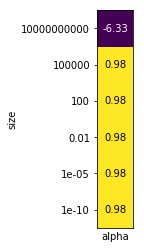

In [32]:
#히트맵
scores=np.array(results.mean_test_score).reshape(6,1)
mglearn.tools.heatmap(scores,xlabel='alpha',xticklabels='',ylabel='size',yticklabels=param_grid['alpha'])

In [35]:
#스케일변환,차원축소PCA
pca=PCA(n_components=2)
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)
print("원본 :",str(X_scaled.shape))
print("변환 :",str(X_pca.shape))


원본 : (2627, 7)
변환 : (2627, 2)


In [8]:
KS["Close"].Series()

AttributeError: 'Series' object has no attribute 'Series'

In [9]:
pd.Series()

Series([], dtype: float64)

In [15]:
a =fdr.DataReader("KS11","2019-1-1")
x  =  a.iloc[0:12,6:8]    
x

""
Date
2019-01-02
2019-01-03
2019-01-04
2019-01-07
2019-01-08
2019-01-09
2019-01-10
2019-01-11
2019-01-14
